In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

In [18]:
import seaborn as sns

In [2]:
prev_url = 'https://api.jsonserve.com/XgAgFJ'
prev_data = requests.get(prev_url)
prev_data_1 = prev_data.json()
prev_df = pd.DataFrame(prev_data_1)

In [3]:
current_url = 'https://api.jsonserve.com/rJvd7g'
current_data = requests.get(current_url)
current_data_1 = current_data.json()


In [4]:
print("Current Data Structure:")
print(current_data_1)

Current Data Structure:
{'id': 336566, 'quiz_id': 43, 'user_id': '7ZXdz3zHuNcdg9agb5YpaOGLQqw2', 'submitted_at': '2025-01-17T15:51:29.859+05:30', 'created_at': '2025-01-17T15:51:29.871+05:30', 'updated_at': '2025-01-17T15:51:29.871+05:30', 'score': 32, 'trophy_level': 2, 'accuracy': '80 %', 'speed': '100', 'final_score': '30.0', 'negative_score': '2.0', 'correct_answers': 8, 'incorrect_answers': 2, 'source': 'live', 'type': 'topic', 'started_at': '2025-01-17T16:20:44.000+05:30', 'ended_at': '2025-01-17T16:21:28.000+05:30', 'duration': '15:00', 'better_than': 24, 'total_questions': 128, 'rank_text': 'Topic Rank - #2402', 'mistakes_corrected': 6, 'initial_mistake_count': 8, 'response_map': {'1837': 7363, '1848': 7407, '1852': 7423, '1862': 7464, '1877': 7525, '1878': 7529, '1900': 7617, '1917': 7685, '1934': 7750, '1964': 7872}, 'quiz': {'id': 43, 'name': None, 'title': 'Structural Organisation in Animals and Plants (7)', 'description': '', 'difficulty_level': None, 'topic': 'Structural 

In [5]:
if isinstance(current_data_1, list):
    current_df = pd.DataFrame(current_data_1)
elif isinstance(current_data_1, dict):
    current_data_list = [current_data_1]
    current_df = pd.DataFrame(current_data_list)

In [6]:
print("Columns in current_df:", current_df.columns)

Columns in current_df: Index(['id', 'quiz_id', 'user_id', 'submitted_at', 'created_at', 'updated_at',
       'score', 'trophy_level', 'accuracy', 'speed', 'final_score',
       'negative_score', 'correct_answers', 'incorrect_answers', 'source',
       'type', 'started_at', 'ended_at', 'duration', 'better_than',
       'total_questions', 'rank_text', 'mistakes_corrected',
       'initial_mistake_count', 'response_map', 'quiz', 'next_steps'],
      dtype='object')


In [7]:
prev_df['score'] = prev_df['score'].replace({'%': '', ',': ''}, regex=True).astype(float)
prev_df['accuracy'] = prev_df['accuracy'].replace({'%': '', ',': ''}, regex=True).astype(float)

In [8]:
prev_df['score'] = pd.to_numeric(prev_df['score'], errors='coerce')
prev_df['accuracy'] = pd.to_numeric(prev_df['accuracy'], errors='coerce')

In [9]:
if 'score' in current_df.columns:
    current_df['score'] = pd.to_numeric(current_df['score'], errors='coerce')
else:
    print("Error: 'score' column not found in the current data.")

if 'accuracy' in current_df.columns:
    current_df['accuracy'] = current_df['accuracy'].replace({'%': '', ',': ''}, regex=True).astype(float)
else:
    print("Error: 'accuracy' column not found in the current data.")

In [10]:
print(current_df.head())

       id  quiz_id                       user_id  \
0  336566       43  7ZXdz3zHuNcdg9agb5YpaOGLQqw2   

                    submitted_at                     created_at  \
0  2025-01-17T15:51:29.859+05:30  2025-01-17T15:51:29.871+05:30   

                      updated_at  score  trophy_level  accuracy speed  ...  \
0  2025-01-17T15:51:29.871+05:30     32             2      80.0   100  ...   

                        ended_at duration  better_than  total_questions  \
0  2025-01-17T16:21:28.000+05:30    15:00           24              128   

            rank_text mistakes_corrected initial_mistake_count  \
0  Topic Rank - #2402                  6                     8   

                                        response_map  \
0  {'1837': 7363, '1848': 7407, '1852': 7423, '18...   

                                                quiz  \
0  {'id': 43, 'name': None, 'title': 'Structural ...   

                     next_steps  
0  [{'pageType': 'resultPage'}]  

[1 rows x 27 columns]


In [11]:
merged_df = pd.concat([prev_df, current_df], ignore_index=True)

In [12]:
topic_performance = merged_df.groupby('quiz_id').agg({
    'score': ['mean', 'std'],
    'accuracy': ['mean', 'std'],
    'total_questions': 'sum',
    'correct_answers': 'sum',
    'incorrect_answers': 'sum'
}).reset_index()

In [13]:
topic_performance.columns = ['_'.join(col).strip() for col in topic_performance.columns.values]


In [14]:
weak_quizzes = topic_performance[(topic_performance['accuracy_mean'] < 0.6) |
                                 (topic_performance['score_mean'] < 60)]
print("Suggested quizzes to focus on due to low performance:")
print(weak_quizzes[['quiz_id_', 'score_mean', 'accuracy_mean']])

Suggested quizzes to focus on due to low performance:
   quiz_id_  score_mean  accuracy_mean
0         6   54.666667           80.0
1        18   52.000000           92.0
2        20   12.000000           30.0
5        43   32.000000           80.0
6        50   24.000000           66.0
8        57   40.000000           38.0
9        58   52.000000           43.0


In [15]:
merged_df['submitted_at'] = pd.to_datetime(merged_df['submitted_at'])


In [16]:
time_performance = merged_df.groupby(merged_df['submitted_at'].dt.date).agg({
    'score': 'mean',
    'accuracy': 'mean'
}).reset_index()

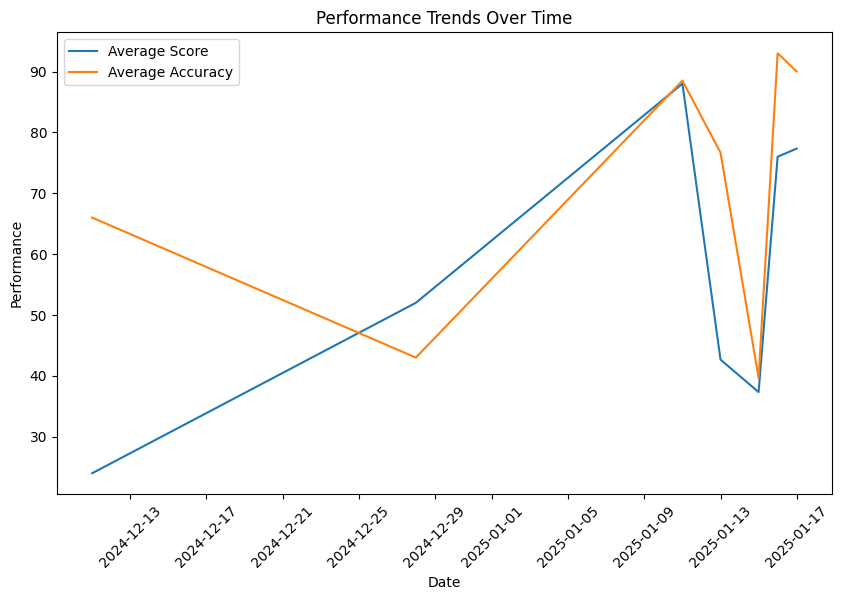

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='submitted_at', y='score', data=time_performance, label='Average Score')
sns.lineplot(x='submitted_at', y='accuracy', data=time_performance, label='Average Accuracy')
plt.title('Performance Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Performance')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [20]:
user_id = 'YcDFSO4ZukTJnnFMgRNVwZTE4j42'

In [21]:
if user_id in merged_df['user_id'].values:
    print(f"User ID {user_id} found in the dataset.")
else:
    print(f"User ID {user_id} not found in the dataset.")

User ID YcDFSO4ZukTJnnFMgRNVwZTE4j42 found in the dataset.


In [22]:
user_data = merged_df[merged_df['user_id'] == user_id]


In [23]:
user_performance = user_data.groupby('quiz_id').agg({
    'score': 'mean',
    'accuracy': 'mean',
    'correct_answers': 'sum',
    'incorrect_answers': 'sum'
}).reset_index()

In [24]:
user_data['quiz_index'] = user_data.groupby('quiz_id').cumcount() + 1
user_data['score_diff'] = user_data.groupby('user_id')['score'].diff()

<ipython-input-24-96c7c505a1bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data['quiz_index'] = user_data.groupby('quiz_id').cumcount() + 1
<ipython-input-24-96c7c505a1bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data['score_diff'] = user_data.groupby('user_id')['score'].diff()


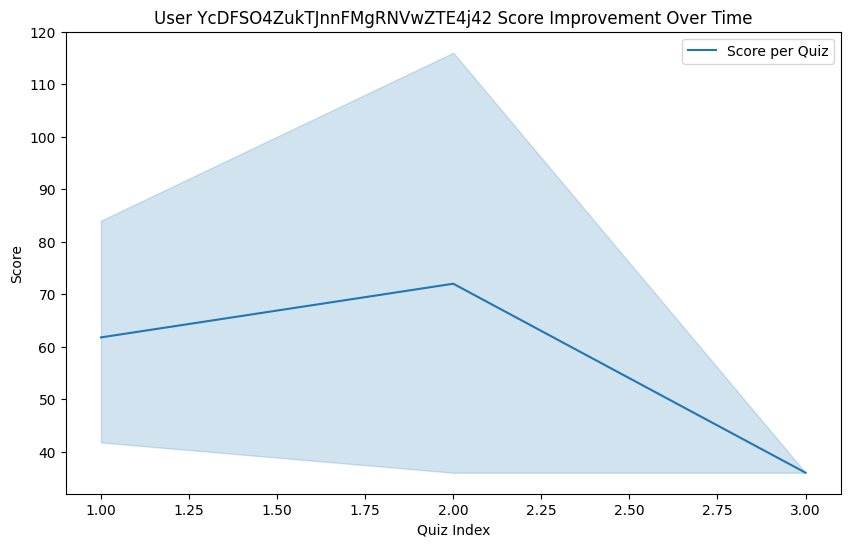

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='quiz_index', y='score', data=user_data, label='Score per Quiz')
plt.title(f'User {user_id} Score Improvement Over Time')
plt.xlabel('Quiz Index')
plt.ylabel('Score')
plt.legend()
plt.show()

In [26]:
weak_quizzes_user = user_performance[(user_performance['accuracy'] < 0.6) |
                                     (user_performance['score'] < 60)]
if weak_quizzes_user.shape[0] > 0:
    print(f"Suggested quizzes for User {user_id} to focus on due to low performance:")
    print(weak_quizzes_user[['quiz_id', 'score', 'accuracy']])

Suggested quizzes for User YcDFSO4ZukTJnnFMgRNVwZTE4j42 to focus on due to low performance:
   quiz_id      score  accuracy
0        6  54.666667      80.0
1       18  52.000000      92.0
2       20  12.000000      30.0
5       50  24.000000      66.0
7       57  40.000000      38.0
8       58  52.000000      43.0


In [27]:
high_difficulty_quizzes = topic_performance[topic_performance['score_mean'] < 50]
if high_difficulty_quizzes.shape[0] > 0:
    print("Consider focusing on easier quizzes to improve performance:")
    print(high_difficulty_quizzes[['quiz_id_', 'score_mean', 'accuracy_mean']])

Consider focusing on easier quizzes to improve performance:
   quiz_id_  score_mean  accuracy_mean
2        20        12.0           30.0
5        43        32.0           80.0
6        50        24.0           66.0
8        57        40.0           38.0


In [29]:
def get_student_person(user_performance):
    if user_performance['score'].mean() < 50:
        return "Beginner"
    elif user_performance['score'].mean() < 70:
        return "Intermediate"
    else:
        return "Advanced"

In [32]:
person = get_student_person(user_performance)
print(f"User {user_id} Person: {person}")

User YcDFSO4ZukTJnnFMgRNVwZTE4j42 Person: Intermediate


In [33]:
if person == "Beginner":
    print("Recommended focus areas for improvement: Focus on fundamental topics and basic quizzes.")
elif person == "Intermediate":
    print("Recommended focus areas for improvement: Work on improving accuracy and attempt harder quizzes.")
else:
    print("Recommended focus areas for improvement: Continue challenging yourself with more difficult quizzes.")


Recommended focus areas for improvement: Work on improving accuracy and attempt harder quizzes.
